In [1]:
import time

import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import Deducer

Lets write a simple function and ask the module to deduce it's asymptotics:

In order to do that we also need a helper function that generates input data

for a given input length.

In [2]:
def square_log(input_data: list) -> None:
    n = len(input_data)
    for i in range(n):
        for j in range(n):
            k = 1
            while k < n:
                input_data[i] + input_data[j] + input_data[k]
                k *= 2

def random_data(n: int) -> list:
    x = np.random.standard_normal(n)
    return x

ded = Deducer(square_log, random_data).deduce()
# '.deduce' method returns a Deducer object responsible for
# collecting and storing data, and for fitting different 'Solvers'

O(1)            =   0.0227                                            :   loss=0.001985,   error=0.001985
O(log n)        =   0.008666 * log(x) + 0                             :   loss=0.001507,   error=0.001507
O(n)            =   0.000542 * x + 0                                  :   loss=0.0004153,   error=0.0004153
O(n log n)      =   0.0001116 * x * log(x) + 0                        :   loss= 0.00027,   error= 0.00027
O(n^2)          =   3.374e-06 * x^2 + 4.663e-06                       :   loss=5.76e-05,   error=5.76e-05
O(n^2 log n)    =   6.422e-07 * x^2 * log(x) + 8.663e-05              :   loss=5.073e-05,   error=5.073e-05
O(n^3)          =   1.606e-08 * x^3 + 0.004111                        :   loss=9.344e-05,   error=9.344e-05
O(n^3 log n)    =   2.989e-09 * x^3 * log(x) + 0.004763               :   loss=0.0001124,   error=0.0001124
O(e^n)          =   0.005992 * exp(0.01518 * x) + 0                   :   loss=0.0001224,   error=0.0001224


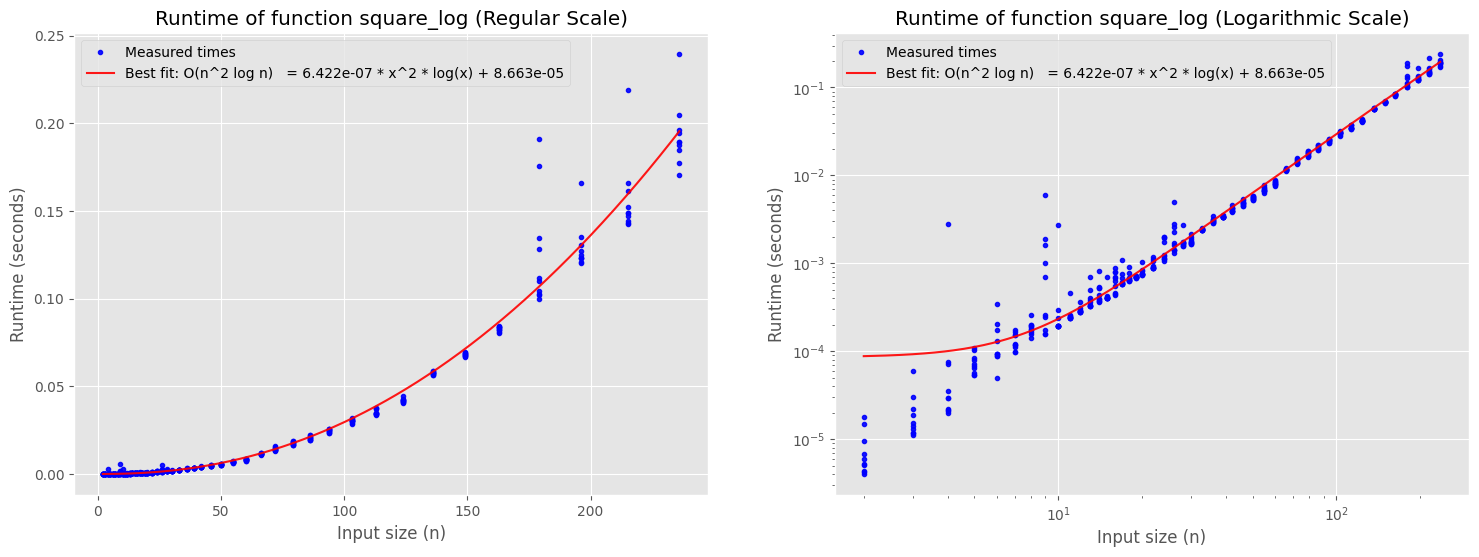

In [3]:
# In order to see a full report we run these two methods:
ded.report()
ded.plot()

In [11]:
# To access one particular Solver and make a prediction with it:
print(ded.get_solver(deduce_asymptotics.Quadratic)[0](1_000))
# Or we can also use the 'best' Solver for that:
print(ded.best_solver(1_000))

# And we can of course measure the real value
print(np.mean([ded.measure_runtime(1_000) for _ in range(5)]))

3.3737948720100603
4.435967828310891
4.163312090200089


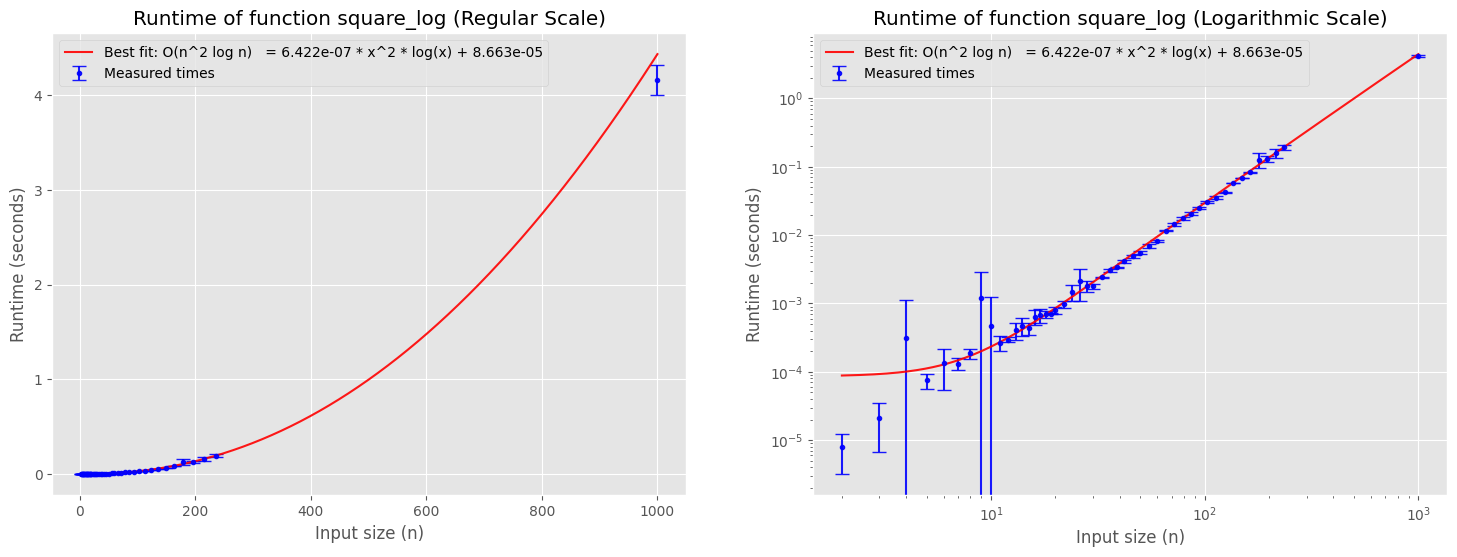

In [13]:
# All new measurements will be stored in the Deducer object automatically:
ded.plot_err()

In [14]:
# We can also refit the Solvers when the data is being updated
# ded.fit()
# Or we can refit one particular Solver:
ded.get_solver(deduce_asymptotics.Quadratic)[0].fit_genetic_l2(*ded.data)
ded.best_solver.fit_genetic_l1(*ded.data)
# Fitting Solvers supports l1 and l2 losses

6.295e-07 * x^2 * log(x) + 5.577e-06

4.147e-06 * x^2 + 7.966e-06
6.295e-07 * x^2 * log(x) + 5.577e-06


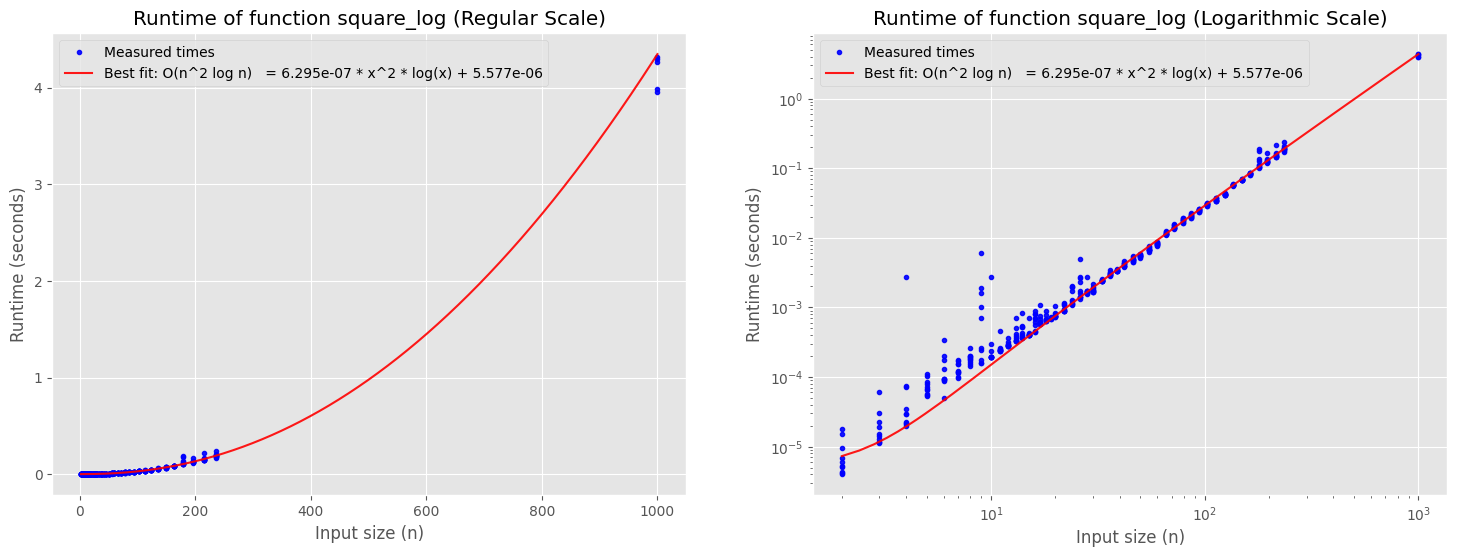

In [15]:
print(ded.get_solver(deduce_asymptotics.Quadratic)[0])
print(ded.best_solver)
ded.plot()

Lets try a different function

07:58:57 Collecting data for 'sum'...
07:58:57 Iteration   0. Input length: 2, Avg time: 1.056e-05 ± 6.649e-06 seconds
07:58:57 Iteration   1. Input length: 3, Avg time: 8.729e-06 ± 2.593e-06 seconds
07:58:57 Iteration   2. Input length: 4, Avg time: 7.975e-06 ± 1.238e-06 seconds
07:58:57 Iteration   3. Input length: 5, Avg time: 2.309e-05 ± 3.242e-05 seconds
07:58:57 Iteration   4. Input length: 6, Avg time: 7.864e-06 ± 1.632e-06 seconds
07:58:57 Iteration   5. Input length: 7, Avg time: 9.278e-06 ± 4.147e-06 seconds
07:58:57 Iteration   6. Input length: 8, Avg time: 8.467e-06 ± 2.209e-06 seconds
07:58:57 Iteration   7. Input length: 9, Avg time: 0.0001725 ± 0.0003192 seconds
07:58:57 Iteration   8. Input length: 10, Avg time: 5.533e-06 ± 2.128e-06 seconds
07:58:57 Iteration   9. Input length: 11, Avg time: 8.905e-06 ± 3.58e-06 seconds
07:58:57 Iteration  10. Input length: 12, Avg time: 6.015e-06 ± 2.527e-06 seconds
07:58:57 Iteration  11. Input length: 13, Avg time: 9.987e-06 ± 3.927

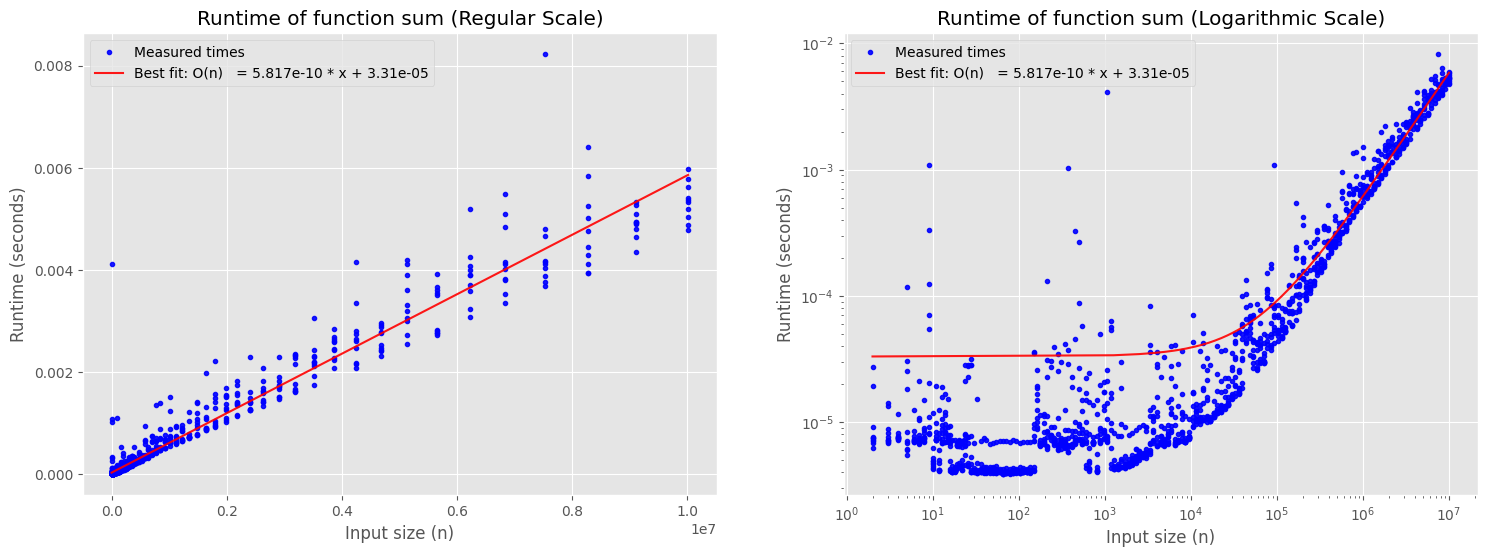

In [16]:
# numpy sum on random data should do the trick!
ded = Deducer(np.sum, lambda n: np.random.uniform(0, 1, n))
# 'verbose' parameter lets you monitor the process in more details.
ded.deduce(time_budget=10, num_samples=10, verbose=True)
ded.report()
ded.plot()

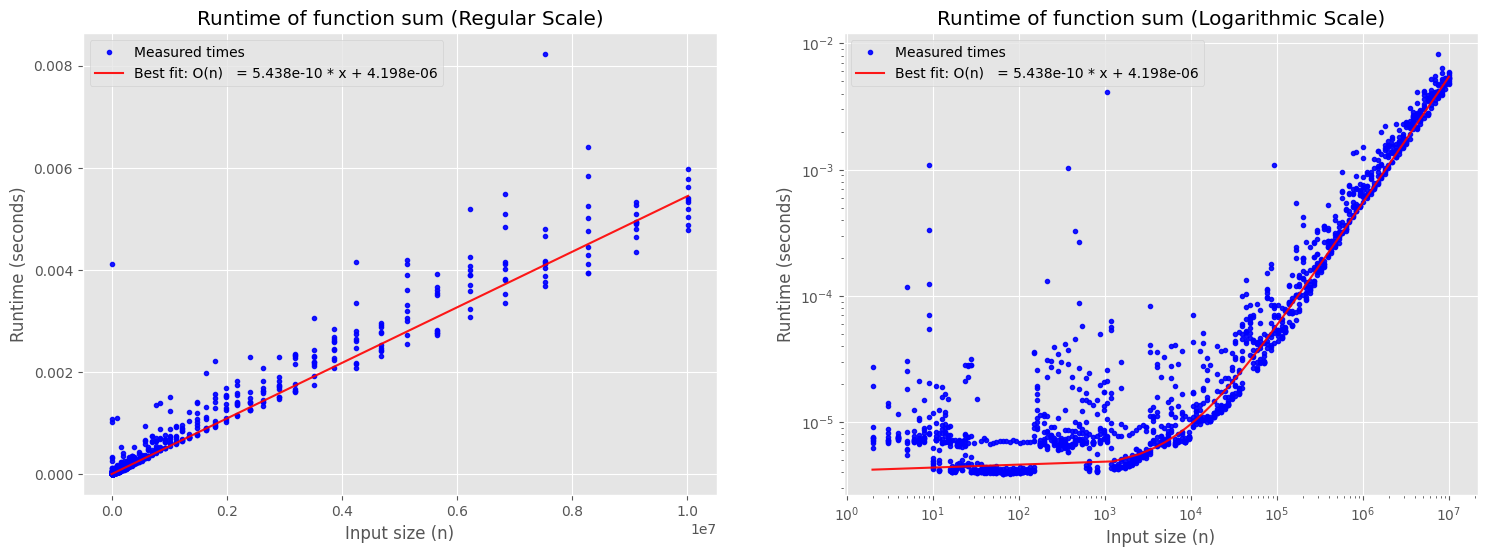

In [17]:
# On a Log-scale plot we can see that for small n there is a 'large' bias.
# That is caused by mean squared error loss giving preference to
# later observations, that are larger in magnitude and have larger errors.

# Of course we ca re-fit the best Solver with l1 if we want to:
ded.best_solver.fit_genetic_l1(*ded.data)
ded.plot()
# Now it is better at working with small input sizes.
# The price for that is being worse a predicting large values.

In [20]:
n = 10**9
ded.best_solver.fit_genetic_l1(*ded.data)
print(ded.best_solver(n))
ded.best_solver.fit_genetic_l2(*ded.data)
print(ded.best_solver(n))

0.5438162926747392
0.5825749762635999


In [ ]:
n = 10**8
print(ded.get_solver(deduce_asymptotics.Linear)[0](n))
print(ded.get_solver(deduce_asymptotics.LinearLog)[0](n))
np.mean([ded.measure_runtime(n) for i in range(5)])

And another function

O(1)            =   0.01757                                           :   loss=0.001588,   error=0.001588
O(log n)        =   0.005633 * log(x) + 0                             :   loss=0.001236,   error=0.001236
O(n)            =   0.0001052 * x + 0                                 :   loss=0.0002499,   error=0.0002499
O(n log n)      =   1.598e-05 * x * log(x) + 2.434e-06                :   loss=0.0001766,   error=0.0001766
O(n^2)          =   1.167e-07 * x^2 + 0.0001828                       :   loss=4.13e-05,   error=4.13e-05
O(n^2 log n)    =   1.667e-08 * x^2 * log(x) + 0.001007               :   loss=4.214e-05,   error=4.214e-05
O(n^3)          =   1.009e-10 * x^3 + 0.004125                        :   loss=9.308e-05,   error=9.308e-05
O(n^3 log n)    =   1.427e-11 * x^3 * log(x) + 0.004283               :   loss=0.0001063,   error=0.0001063
O(e^n)          =   0.006323 * exp(0.00275 * x) + 0                   :   loss=0.0001017,   error=0.0001017


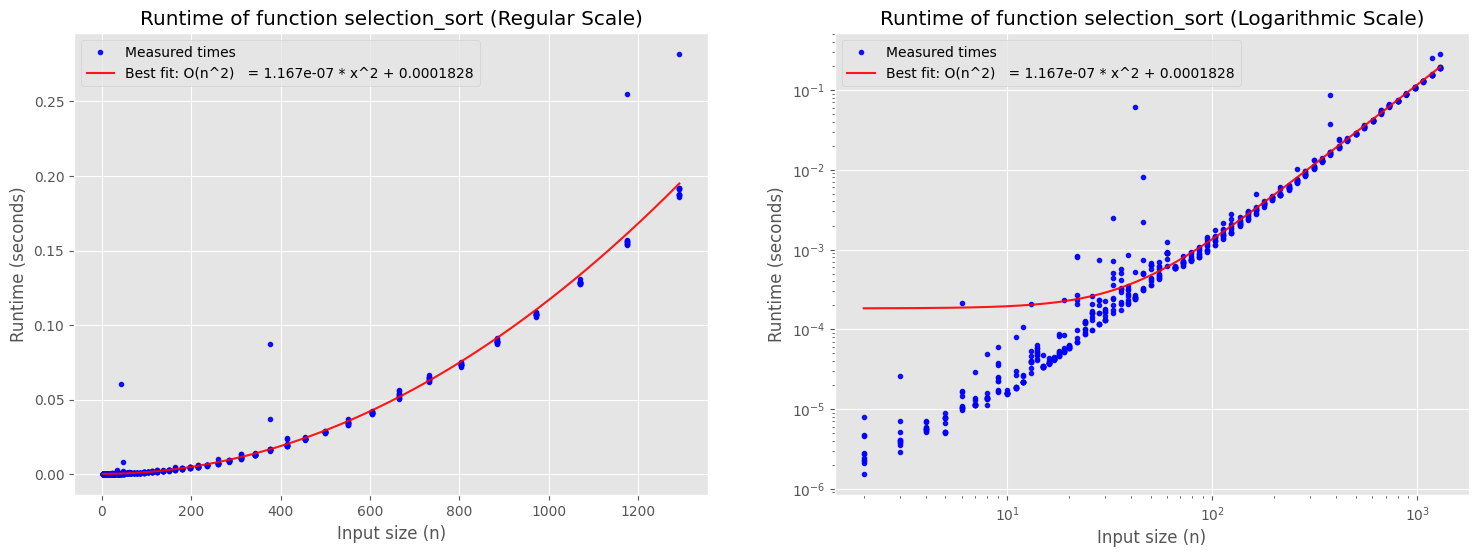

In [21]:
def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

ded = Deducer(selection_sort, random_data).deduce()
ded.report()
ded.plot()

O(1)            =   1.446e-05                                         :   loss=1.799e-10,   error=1.799e-10
O(log n)        =   1.283e-06 * log(x) + 2.087e-06                    :   loss=1.644e-10,   error=1.644e-10
O(n)            =   4.946e-12 * x + 1.306e-05                         :   loss=1.715e-10,   error=1.715e-10
O(n log n)      =   2.94e-13 * x * log(x) + 1.344e-05                 :   loss=1.722e-10,   error=1.722e-10
O(n^2)          =   0 * x^2 + 1.455e-05                               :   loss=1.799e-10,   error=1.799e-10
O(n^2 log n)    =   0 * x^2 * log(x) + 1.454e-05                      :   loss=1.799e-10,   error=1.799e-10
O(n^3)          =   0 * x^3 + 1.457e-05                               :   loss=1.799e-10,   error=1.799e-10
O(n^3 log n)    =   0 * x^3 * log(x) + 1.453e-05                      :   loss=1.799e-10,   error=1.799e-10
O(e^n)          =   1.192e-05 * exp(2.665e-07 * x) + 1.488e-06        :   loss=1.729e-10,   error=1.729e-10


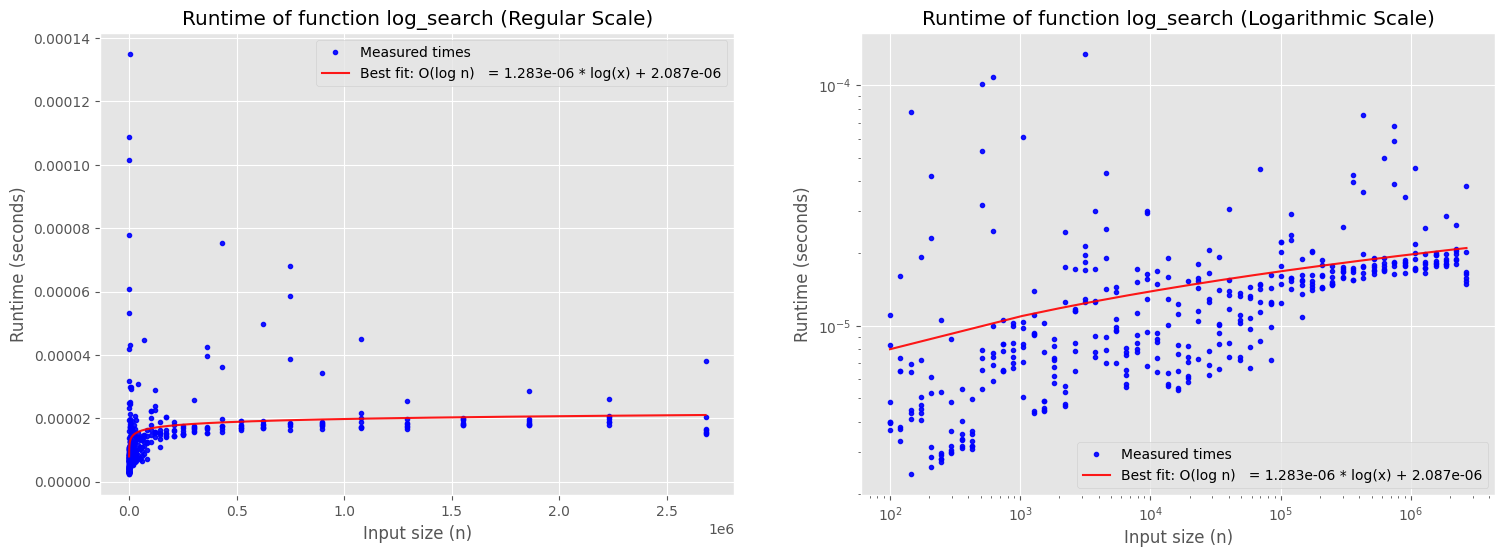

In [22]:
def log_search(input_data: list, key: int=0) -> int:
    left = 0
    right = len(input_data) - 1
    while left < right:
        middle = (left + right) // 2
        if input_data[middle] == key:
            return middle
        elif input_data[middle] < key:
            left = middle + 1
        else:
            right = middle - 1
    return -1

def random_sorted_data(n: int) -> list:
    x = np.random.uniform(-1, 1, n)
    x = np.sort(x)
    return x

ded = Deducer(log_search, random_sorted_data)
# We can change time budget (for data collection), number of times to execute
# function at each point (default value is 10 times), step change policy
# and starting point.
ded.deduce(time_budget=10, num_samples=7, step=lambda n: int(n * 1.2), start=100)
ded.report()
ded.plot()

O(1)            =   0.032                                             :   loss=0.005466,   error=0.005466
O(log n)        =   0.005307 * log(x) + 0                             :   loss=0.004737,   error=0.004737
O(n)            =   5.396e-06 * x + 9.489e-06                         :   loss=0.0007508,   error=0.0007508
O(n log n)      =   5.317e-07 * x * log(x) + 4.632e-06                :   loss=0.0005761,   error=0.0005761
O(n^2)          =   1.633e-10 * x^2 + 1.705e-06                       :   loss=1.291e-05,   error=1.291e-05
O(n^2 log n)    =   1.54e-11 * x^2 * log(x) + 0.0007354               :   loss=1.377e-05,   error=1.377e-05
O(n^3)          =   3.553e-15 * x^3 + 0.008924                        :   loss=0.0002334,   error=0.0002334
O(n^3 log n)    =   0 * x^3 * log(x) + 0.032                          :   loss=0.005466,   error=0.005466
O(e^n)          =   0.01165 * exp(7.538e-05 * x) + 2.05e-06           :   loss=0.0002424,   error=0.0002424


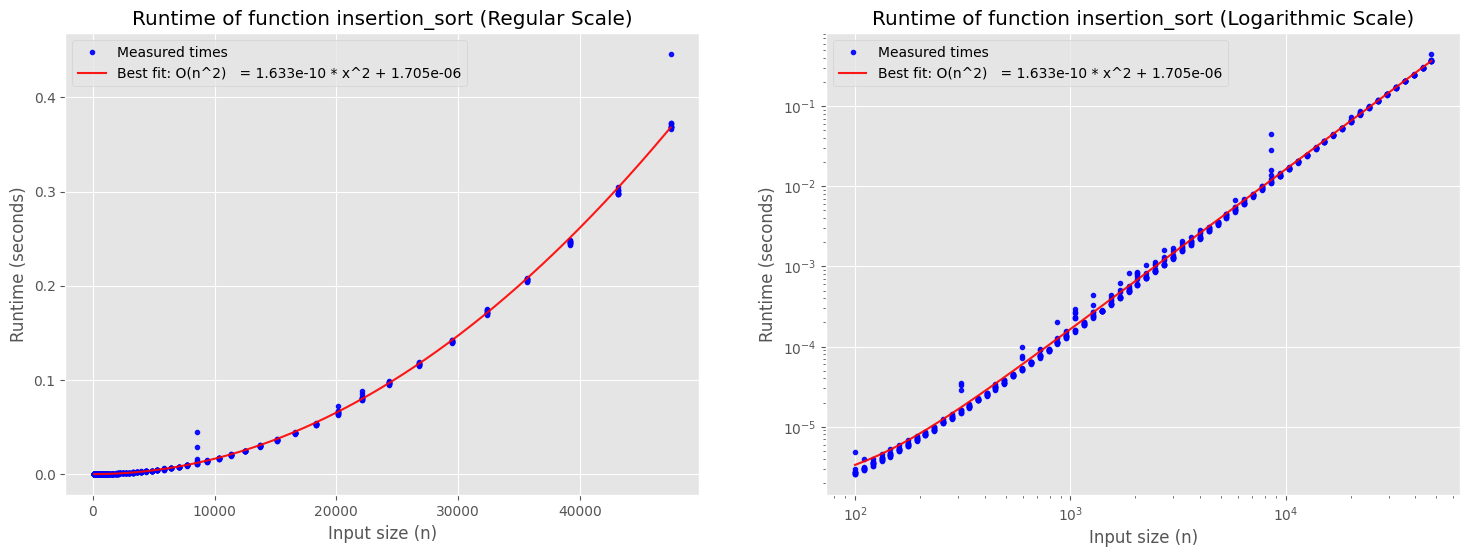

In [23]:
@numba.njit
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

insertion_sort(random_data(50))  # Warm up for numba.jit
ded = Deducer(insertion_sort, random_data)
ded.deduce(time_budget=20, num_samples=10, start=100)
ded.report()
ded.plot()

O(1)            =   0.01096                                           :   loss=0.0007869,   error=0.0007869
O(log n)        =   0.001997 * log(x) + 0                             :   loss=0.0006148,   error=0.0006148
O(n)            =   9.741e-08 * x + 2.817e-05                         :   loss=3.244e-05,   error=3.244e-05
O(n log n)      =   7.084e-09 * x * log(x) + 1.695e-05                :   loss=3.064e-05,   error=3.064e-05
O(n^2)          =   8.171e-14 * x^2 + 0.003356                        :   loss=9.637e-05,   error=9.637e-05
O(n^2 log n)    =   6.217e-15 * x^2 * log(x) + 0.003111               :   loss=0.0001074,   error=0.0001074
O(n^3)          =   0 * x^3 + 0.01096                                 :   loss=0.0007869,   error=0.0007869
O(n^3 log n)    =   0 * x^3 * log(x) + 0.01096                        :   loss=0.0007869,   error=0.0007869
O(e^n)          =   0.008024 * exp(2.118e-06 * x) + 1.967e-05         :   loss=0.0001628,   error=0.0001628


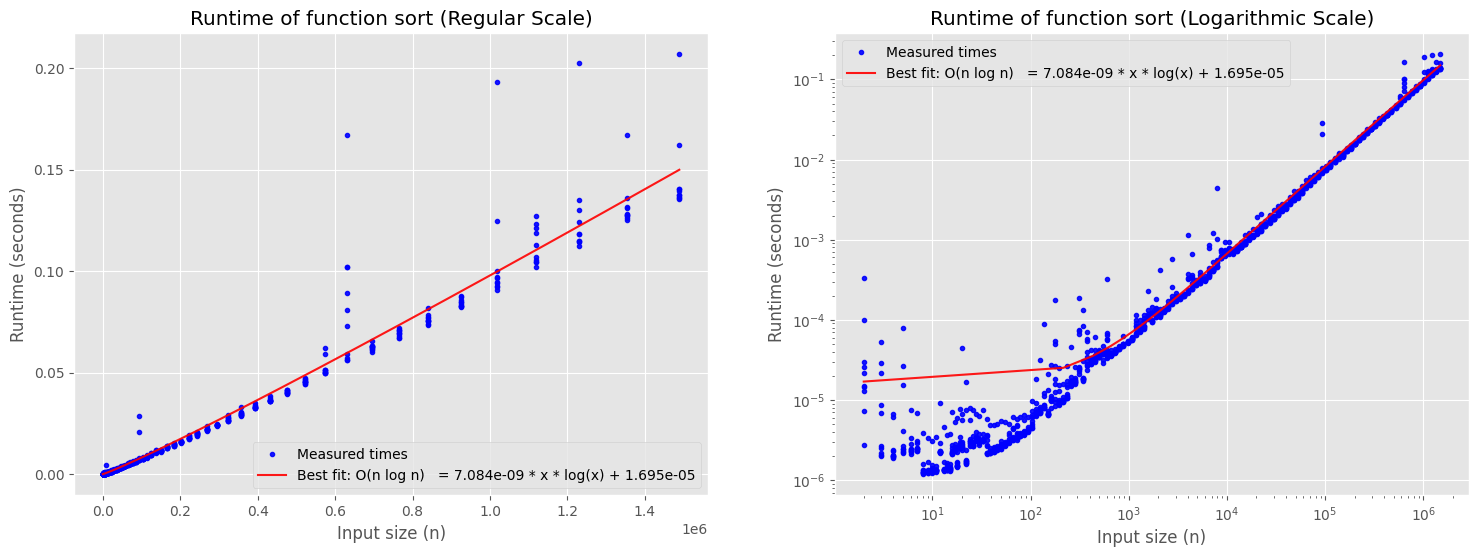

In [24]:
ded = Deducer(np.sort, random_data)
ded.deduce(time_budget=20, num_samples=10)
ded.report()
ded.plot()

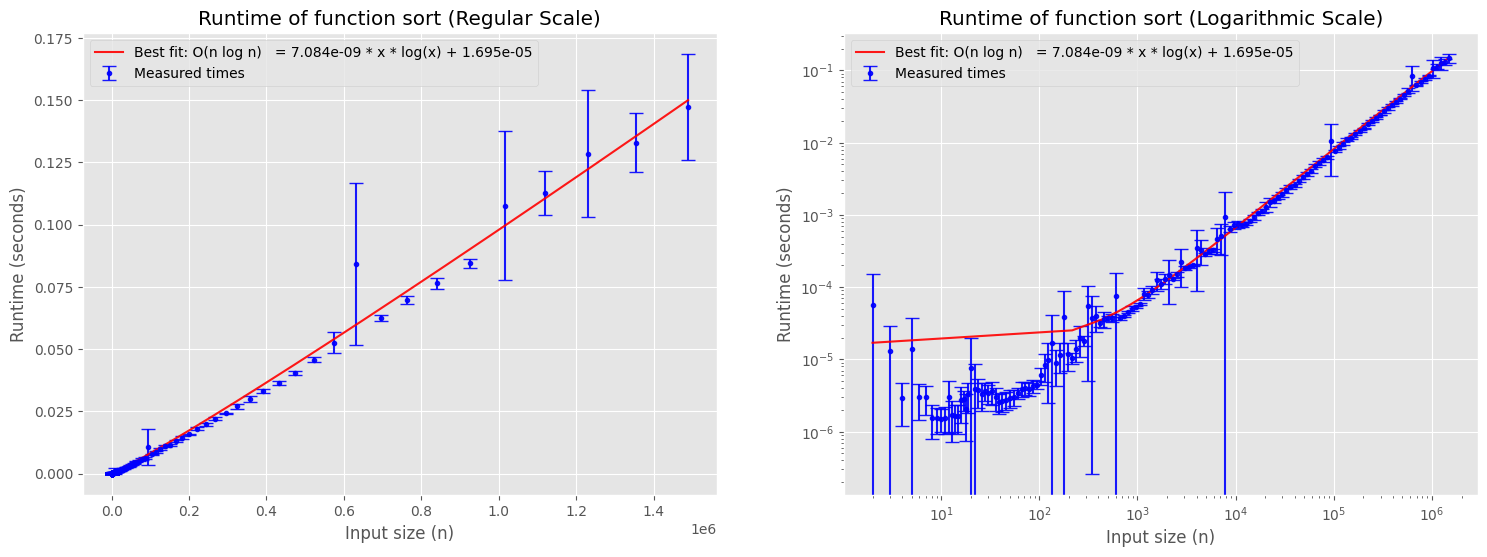

In [26]:
# I personally prefer the raw data points, but in case someone
# likes error bars, we can plot them instead:
ded.plot_err()

And the mystery of mankind, the runtime on empty fucniton!

O(1)            =   1.154e-06                                         :   loss=8.075e-12,   error=8.075e-12
O(log n)        =   1.423e-07 * log(x) + 5.784e-09                    :   loss=7.614e-12,   error=7.614e-12
O(n)            =   3.499e-13 * x + 9.93e-07                          :   loss=7.933e-12,   error=7.933e-12
O(n log n)      =   2.309e-14 * x * log(x) + 1.085e-06                :   loss=7.947e-12,   error=7.947e-12
O(n^2)          =   0 * x^2 + 1.163e-06                               :   loss=8.075e-12,   error=8.075e-12
O(n^2 log n)    =   0 * x^2 * log(x) + 1.162e-06                      :   loss=8.075e-12,   error=8.075e-12
O(n^3)          =   0 * x^3 + 1.155e-06                               :   loss=8.075e-12,   error=8.075e-12
O(n^3 log n)    =   0 * x^3 * log(x) + 1.156e-06                      :   loss=8.075e-12,   error=8.075e-12
O(e^n)          =   1.025e-06 * exp(2.002e-07 * x) + 1.318e-08        :   loss=7.967e-12,   error=7.967e-12


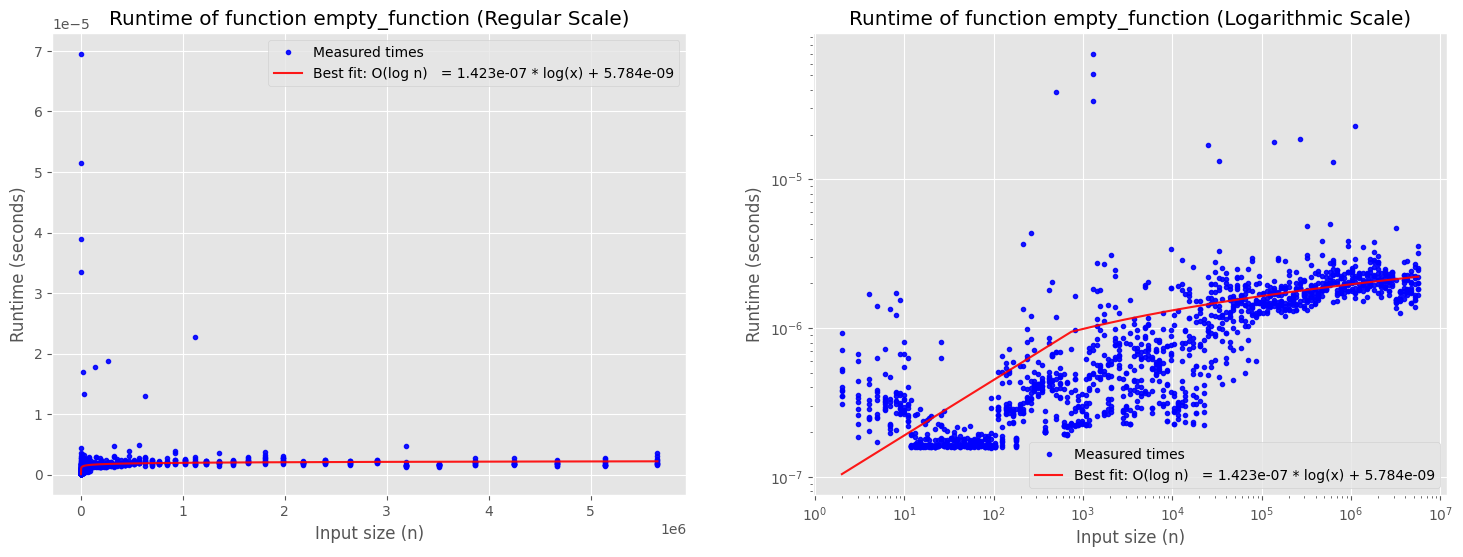

In [27]:
def empty_function(x):
    pass

ded = Deducer(empty_function, random_data)
ded.deduce(time_budget=20, num_samples=10)
ded.report()
ded.plot()

In [ ]:
# 'Deducer' thinks the complexity is logarithmic...
# But looking at the data, can we really blame it?

In [29]:
# Number of measurements taken:
print(len(ded.data[0]))

1530


And a small gift for those who reached this far

O(n^p)          =   3.209e-08 * x^1.074 + 2.111e-06                   :   loss=2.186e-07,   error=2.186e-07
O(n^p log^d n)  =   2.291e-08 * x^1.059 * log^0.2074 x + 7.727e-06    :   loss=2.188e-07,   error=2.188e-07


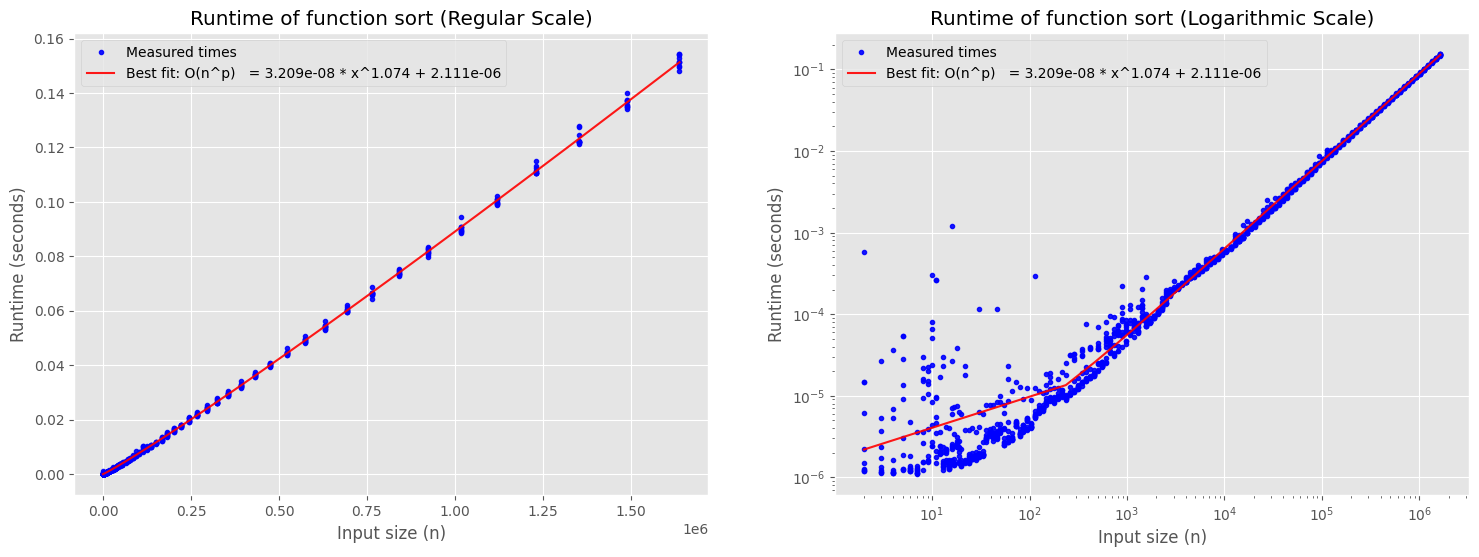

In [30]:
ded = Deducer(np.sort, random_data)
ded.deduce(time_budget=20, num_samples=10, extras=True)
ded.report()
ded.plot()